Stories : articles CNN à résumer

In [1]:
import nltk
! python -m nltk.downloader all

/usr/lib64/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/vincent/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/vincent/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/vincent/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/vincent/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       u

In [2]:
from os import listdir

ROOT_DIR = './cnn/stories_keep/'
folder_content = listdir('./cnn/stories_keep')

In [3]:
higlight_array = []

for file in folder_content:
	with open(ROOT_DIR+file) as f:
		lines = f.readline().rstrip().lower()
	higlight_array.append(str(lines))

In [4]:
higlight_array[0]

"hong kong (cnn) -- the number of tibetans in china who have set themselves on fire to protest beijing's rule has reached 100, according to tibetan advocacy groups."

In [5]:
docs_array = []

for file in folder_content:
	with open(ROOT_DIR+file) as f:
		lines = [line.rstrip().lower() for line in f.readlines()[1:]]
	docs_array.append(str(lines))


In [6]:
docs_array[0]

'[\'\', \'lobsang namgyal, a 37-year-old former monk, set himself on fire earlier this month in aba prefecture, known in tibetan as ngaba, an ethnically tibetan area of the chinese province of sichuan, according to free tibet, a london-based advocacy group.\', \'\', \'"this grim milestone should be a source of shame to the chinese authorities who are responsible and to the world leaders who have yet to show any leadership in response to the ongoing crisis in tibet," said stephanie brigden, the director of free tibet.\', \'\', \'self-immolation has become a desperate form of protest in recent years for ethnic tibetans unhappy with chinese rule, and it shows no sign of abating.\', \'\', \'of the 100 tibetans who have now set themselves on fire in china, at least 82 are believed to have died from the act, according to the international campaign for tibet.\', \'\', \'lobsang namgyal died at the scene, and his body was removed by local authorities, who cremated it and returned the ashes to 

In [7]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
filtre_stopw =  lambda text: [token.lower() for token in text if token.lower() not in stopwords]

tokenizer = nltk.RegexpTokenizer(r'\w+')

from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

# tokenize and remove stop words
def tokenize_sw(doc):
	nltk.word_tokenize(doc)
	filtered = filtre_stopw(tokenizer.tokenize(doc))
	# nltk.FreqDist(filtered).most_common()
	return [stemmer.stem(s) for s in filtered] 


tokenized_array = list(map(tokenize_sw, docs_array))
print(len(tokenized_array))


190


In [8]:

# tokenized_array[0]


In [9]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer().fit(docs_array)
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.")
vectorizer.vocabulary_.get('wire')


vectorizer.transform(['Something completely new.']).toarray()

vectorizer.get_feature_names()

/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '02',
 '04',
 '0515',
 '10',
 '100',
 '1000',
 '100th',
 '102',
 '103',
 '107',
 '108',
 '10th',
 '11',
 '111',
 '112th',
 '118',
 '118th',
 '11th',
 '12',
 '120',
 '125',
 '126',
 '128',
 '129',
 '12th',
 '13',
 '130',
 '135',
 '136a',
 '14',
 '145',
 '14th',
 '15',
 '150',
 '150th',
 '158',
 '15th',
 '16',
 '160',
 '1600',
 '160th',
 '165',
 '166',
 '17',
 '170',
 '172',
 '175',
 '178',
 '1793',
 '18',
 '180',
 '1800s',
 '1850s',
 '186',
 '1869',
 '187',
 '1874',
 '1879',
 '1886',
 '1892',
 '18th',
 '19',
 '190',
 '1900s',
 '1914',
 '1915',
 '1917',
 '192',
 '1920',
 '1920s',
 '1926',
 '1930s',
 '1932',
 '1935',
 '1936',
 '1944',
 '1950s',
 '1953',
 '1955',
 '1959',
 '1960',
 '1960s',
 '1961',
 '1963',
 '1964',
 '1965',
 '1967',
 '1969',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1981',
 '1982',
 '1983',
 '1987',
 '1988',
 '1989',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996

In [10]:


from sklearn.feature_extraction.text import TfidfVectorizer
transformer = TfidfVectorizer()
X = transformer.fit_transform(docs_array)

transformer.get_feature_names_out()
transformer.get_feature_names()
# print(X.shape)


['00',
 '000',
 '02',
 '04',
 '0515',
 '10',
 '100',
 '1000',
 '100th',
 '102',
 '103',
 '107',
 '108',
 '10th',
 '11',
 '111',
 '112th',
 '118',
 '118th',
 '11th',
 '12',
 '120',
 '125',
 '126',
 '128',
 '129',
 '12th',
 '13',
 '130',
 '135',
 '136a',
 '14',
 '145',
 '14th',
 '15',
 '150',
 '150th',
 '158',
 '15th',
 '16',
 '160',
 '1600',
 '160th',
 '165',
 '166',
 '17',
 '170',
 '172',
 '175',
 '178',
 '1793',
 '18',
 '180',
 '1800s',
 '1850s',
 '186',
 '1869',
 '187',
 '1874',
 '1879',
 '1886',
 '1892',
 '18th',
 '19',
 '190',
 '1900s',
 '1914',
 '1915',
 '1917',
 '192',
 '1920',
 '1920s',
 '1926',
 '1930s',
 '1932',
 '1935',
 '1936',
 '1944',
 '1950s',
 '1953',
 '1955',
 '1959',
 '1960',
 '1960s',
 '1961',
 '1963',
 '1964',
 '1965',
 '1967',
 '1969',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1981',
 '1982',
 '1983',
 '1987',
 '1988',
 '1989',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996

In [11]:
from nltk.stem.snowball import EnglishStemmer

stemmer = EnglishStemmer()

# stemize every word in every documents
def stemize_docs(docs):
    for doc in docs:
       map(lambda item: stemmer.stem(item), doc)
    # return docs


stemize_docs(tokenized_array)
# tokenized_array


In [21]:
merged_tokenized_array = [str(doc) for doc in tokenized_array]
# merged_tokenized_array = map(str, merged_tokenized_array)
merged_tokenized_array

["['lobsang', 'namgyal', '37', 'year', 'old', 'former', 'monk', 'set', 'fire', 'earlier', 'month', 'aba', 'prefectur', 'known', 'tibetan', 'ngaba', 'ethnic', 'tibetan', 'area', 'chines', 'provinc', 'sichuan', 'accord', 'free', 'tibet', 'london', 'base', 'advocaci', 'group', 'grim', 'mileston', 'sourc', 'shame', 'chines', 'author', 'respons', 'world', 'leader', 'yet', 'show', 'leadership', 'respons', 'ongo', 'crisi', 'tibet', 'said', 'stephani', 'brigden', 'director', 'free', 'tibet', 'self', 'immol', 'becom', 'desper', 'form', 'protest', 'recent', 'year', 'ethnic', 'tibetan', 'unhappi', 'chines', 'rule', 'show', 'sign', 'abat', '100', 'tibetan', 'set', 'fire', 'china', 'least', '82', 'believ', 'die', 'act', 'accord', 'intern', 'campaign', 'tibet', 'lobsang', 'namgyal', 'die', 'scene', 'bodi', 'remov', 'local', 'author', 'cremat', 'return', 'ash', 'famili', 'free', 'tibet', 'said', 'statement', 'wednesday', 'without', 'specifi', 'got', 'inform', 'timelin', 'tibetan', 'protest', 'china',

In [14]:
import re
def to_british(tokens):
    for t in tokens:
        t = re.sub(r"(...)our$", r"\1or", t)
        t = re.sub(r"([bt])re$", r"\1er", t)
        t = re.sub(r"([iy])s(e$|ing|ation)", r"\1z\2", t)
        t = re.sub(r"ogue$", "og", t)
        yield t

class CustomVectorizer(CountVectorizer):
    def build_tokenizer(self):
        tokenize = super().build_tokenizer()
        # return lambda doc: list(to_british(tokenize(doc)))
        return lambda doc: list(stemmer.stem(tokenize(doc)))

print(CustomVectorizer().build_analyzer()(u"color colour"))

AttributeError: 'list' object has no attribute 'lower'

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

tfIdfTransformer = TfidfTransformer(use_idf=True)
countVectorizer = CountVectorizer()
wordCount = countVectorizer.fit_transform(docs_array)
newTfIdf = tfIdfTransformer.fit_transform(wordCount)
df = pd.DataFrame(newTfIdf[0].T.todense(), index=countVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

               TF-IDF
tibetan      0.463394
tibetans     0.297896
tibet        0.264797
the          0.214348
self         0.206544
china        0.188223
fire         0.168821
to           0.163306
in           0.163306
chinese      0.157019
of           0.143649
set          0.123220
monk         0.122742
nepal        0.115890
himself      0.111346
free         0.109825
on           0.099864
immolations  0.099299
aba          0.099299
india        0.094067
immolation   0.092056
died         0.084411
beijing      0.076922
protest      0.076922
rule         0.074536


In [43]:
print(transformer.get_feature_names_out())

['00' '000' '02' ... 'zoomed' 'zubrin' 'zuid']


(190, 2)


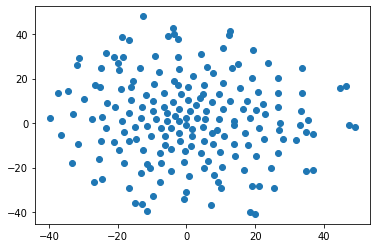

In [28]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
print(X_embedded.shape)

import matplotlib.pyplot as plt
plt.scatter(X_embedded[:,0], X_embedded[:,1])

In [6]:

test = files_array[0]
nltk.word_tokenize(test)

['[',
 '``',
 'Hong',
 'Kong',
 '(',
 'CNN',
 ')',
 '--',
 'The',
 'number',
 'of',
 'Tibetans',
 'in',
 'China',
 'who',
 'have',
 'set',
 'themselves',
 'on',
 'fire',
 'to',
 'protest',
 'Beijing',
 "'s",
 'rule',
 'has',
 'reached',
 '100',
 ',',
 'according',
 'to',
 'Tibetan',
 'advocacy',
 'groups',
 '.',
 '``',
 ',',
 '``',
 ',',
 "'Lobsang",
 'Namgyal',
 ',',
 'a',
 '37-year-old',
 'former',
 'monk',
 ',',
 'set',
 'himself',
 'on',
 'fire',
 'earlier',
 'this',
 'month',
 'in',
 'Aba',
 'prefecture',
 ',',
 'known',
 'in',
 'Tibetan',
 'as',
 'Ngaba',
 ',',
 'an',
 'ethnically',
 'Tibetan',
 'area',
 'of',
 'the',
 'Chinese',
 'province',
 'of',
 'Sichuan',
 ',',
 'according',
 'to',
 'Free',
 'Tibet',
 ',',
 'a',
 'London-based',
 'advocacy',
 'group',
 '.',
 "'",
 ',',
 '``',
 ',',
 "'",
 "''",
 'This',
 'grim',
 'milestone',
 'should',
 'be',
 'a',
 'source',
 'of',
 'shame',
 'to',
 'the',
 'Chinese',
 'authorities',
 'who',
 'are',
 'responsible',
 'and',
 'to',
 'the',


In [7]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokenizer.tokenize(test)

['Hong',
 'Kong',
 'CNN',
 'The',
 'number',
 'of',
 'Tibetans',
 'in',
 'China',
 'who',
 'have',
 'set',
 'themselves',
 'on',
 'fire',
 'to',
 'protest',
 'Beijing',
 's',
 'rule',
 'has',
 'reached',
 '100',
 'according',
 'to',
 'Tibetan',
 'advocacy',
 'groups',
 'Lobsang',
 'Namgyal',
 'a',
 '37',
 'year',
 'old',
 'former',
 'monk',
 'set',
 'himself',
 'on',
 'fire',
 'earlier',
 'this',
 'month',
 'in',
 'Aba',
 'prefecture',
 'known',
 'in',
 'Tibetan',
 'as',
 'Ngaba',
 'an',
 'ethnically',
 'Tibetan',
 'area',
 'of',
 'the',
 'Chinese',
 'province',
 'of',
 'Sichuan',
 'according',
 'to',
 'Free',
 'Tibet',
 'a',
 'London',
 'based',
 'advocacy',
 'group',
 'This',
 'grim',
 'milestone',
 'should',
 'be',
 'a',
 'source',
 'of',
 'shame',
 'to',
 'the',
 'Chinese',
 'authorities',
 'who',
 'are',
 'responsible',
 'and',
 'to',
 'the',
 'world',
 'leaders',
 'who',
 'have',
 'yet',
 'to',
 'show',
 'any',
 'leadership',
 'in',
 'response',
 'to',
 'the',
 'ongoing',
 'crisi

In [8]:
filtered = filtre_stopw( tokenizer.tokenize(test) )
filtered

['hong',
 'kong',
 'cnn',
 'number',
 'tibetans',
 'china',
 'set',
 'fire',
 'protest',
 'beijing',
 'rule',
 'reached',
 '100',
 'according',
 'tibetan',
 'advocacy',
 'groups',
 'lobsang',
 'namgyal',
 '37',
 'year',
 'old',
 'former',
 'monk',
 'set',
 'fire',
 'earlier',
 'month',
 'aba',
 'prefecture',
 'known',
 'tibetan',
 'ngaba',
 'ethnically',
 'tibetan',
 'area',
 'chinese',
 'province',
 'sichuan',
 'according',
 'free',
 'tibet',
 'london',
 'based',
 'advocacy',
 'group',
 'grim',
 'milestone',
 'source',
 'shame',
 'chinese',
 'authorities',
 'responsible',
 'world',
 'leaders',
 'yet',
 'show',
 'leadership',
 'response',
 'ongoing',
 'crisis',
 'tibet',
 'said',
 'stephanie',
 'brigden',
 'director',
 'free',
 'tibet',
 'self',
 'immolation',
 'become',
 'desperate',
 'form',
 'protest',
 'recent',
 'years',
 'ethnic',
 'tibetans',
 'unhappy',
 'chinese',
 'rule',
 'shows',
 'sign',
 'abating',
 '100',
 'tibetans',
 'set',
 'fire',
 'china',
 'least',
 '82',
 'believe

In [9]:
fd = nltk.FreqDist(filtered)
print(fd.most_common())

[('tibetan', 15), ('china', 11), ('tibetans', 10), ('fire', 9), ('self', 9), ('set', 8), ('tibet', 8), ('chinese', 7), ('free', 6), ('said', 5), ('protest', 4), ('beijing', 4), ('rule', 4), ('according', 4), ('monk', 4), ('died', 4), ('india', 4), ('nepal', 4), ('highlight', 4), ('advocacy', 3), ('aba', 3), ('authorities', 3), ('immolation', 3), ('local', 3), ('protests', 3), ('february', 3), ('immolations', 3), ('inside', 3), ('comment', 3), ('man', 3), ('police', 3), ('cnn', 2), ('100', 2), ('groups', 2), ('lobsang', 2), ('namgyal', 2), ('year', 2), ('old', 2), ('former', 2), ('month', 2), ('based', 2), ('group', 2), ('form', 2), ('recent', 2), ('years', 2), ('ethnic', 2), ('act', 2), ('wednesday', 2), ('taken', 2), ('took', 2), ('3', 2), ('officials', 2), ('foreign', 2), ('thursday', 2), ('young', 2), ('another', 2), ('followed', 2), ('last', 2), ('countries', 2), ('buddhist', 2), ('nepalese', 2), ('kathmandu', 2), ('refugees', 2), ('make', 2), ('government', 2), ('dalai', 2), ('lam

In [10]:
from nltk.stem.snowball import EnglishStemmer

stemmer = EnglishStemmer()

for w in filtered:
	print(stemmer.stem(w))

hong
kong
cnn
number
tibetan
china
set
fire
protest
beij
rule
reach
100
accord
tibetan
advocaci
group
lobsang
namgyal
37
year
old
former
monk
set
fire
earlier
month
aba
prefectur
known
tibetan
ngaba
ethnic
tibetan
area
chines
provinc
sichuan
accord
free
tibet
london
base
advocaci
group
grim
mileston
sourc
shame
chines
author
respons
world
leader
yet
show
leadership
respons
ongo
crisi
tibet
said
stephani
brigden
director
free
tibet
self
immol
becom
desper
form
protest
recent
year
ethnic
tibetan
unhappi
chines
rule
show
sign
abat
100
tibetan
set
fire
china
least
82
believ
die
act
accord
intern
campaign
tibet
lobsang
namgyal
die
scene
bodi
remov
local
author
cremat
return
ash
famili
free
tibet
said
statement
wednesday
without
specifi
got
inform
timelin
tibetan
protest
china
advocaci
group
said
taken
10
day
confirm
self
immol
took
place
februari
3
tibetan
frighten
chines
state
repris
speak
protest
independ
verifi
report
self
immol
insid
china
often
difficult
restrict
report
restiv
area
rel

In [11]:
list(nltk.bigrams(filtered))

[('hong', 'kong'),
 ('kong', 'cnn'),
 ('cnn', 'number'),
 ('number', 'tibetans'),
 ('tibetans', 'china'),
 ('china', 'set'),
 ('set', 'fire'),
 ('fire', 'protest'),
 ('protest', 'beijing'),
 ('beijing', 'rule'),
 ('rule', 'reached'),
 ('reached', '100'),
 ('100', 'according'),
 ('according', 'tibetan'),
 ('tibetan', 'advocacy'),
 ('advocacy', 'groups'),
 ('groups', 'lobsang'),
 ('lobsang', 'namgyal'),
 ('namgyal', '37'),
 ('37', 'year'),
 ('year', 'old'),
 ('old', 'former'),
 ('former', 'monk'),
 ('monk', 'set'),
 ('set', 'fire'),
 ('fire', 'earlier'),
 ('earlier', 'month'),
 ('month', 'aba'),
 ('aba', 'prefecture'),
 ('prefecture', 'known'),
 ('known', 'tibetan'),
 ('tibetan', 'ngaba'),
 ('ngaba', 'ethnically'),
 ('ethnically', 'tibetan'),
 ('tibetan', 'area'),
 ('area', 'chinese'),
 ('chinese', 'province'),
 ('province', 'sichuan'),
 ('sichuan', 'according'),
 ('according', 'free'),
 ('free', 'tibet'),
 ('tibet', 'london'),
 ('london', 'based'),
 ('based', 'advocacy'),
 ('advocacy', 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
values = tfidf.fit_transform([test, test])
print(values)

  (0, 132)	0.013016685067210314
  (0, 81)	0.013016685067210314
  (0, 83)	0.013016685067210314
  (0, 186)	0.013016685067210314
  (0, 278)	0.013016685067210314
  (0, 131)	0.013016685067210314
  (0, 2)	0.013016685067210314
  (0, 233)	0.013016685067210314
  (0, 185)	0.013016685067210314
  (0, 121)	0.052066740268841255
  (0, 219)	0.013016685067210314
  (0, 61)	0.013016685067210314
  (0, 248)	0.013016685067210314
  (0, 174)	0.013016685067210314
  (0, 152)	0.013016685067210314
  (0, 260)	0.013016685067210314
  (0, 215)	0.013016685067210314
  (0, 57)	0.013016685067210314
  (0, 125)	0.013016685067210314
  (0, 53)	0.013016685067210314
  (0, 172)	0.013016685067210314
  (0, 136)	0.013016685067210314
  (0, 112)	0.013016685067210314
  (0, 261)	0.013016685067210314
  (0, 166)	0.013016685067210314
  :	:
  (1, 17)	0.03905005520163094
  (1, 276)	0.1952502760081547
  (1, 11)	0.052066740268841255
  (1, 1)	0.026033370134420628
  (1, 212)	0.013016685067210314
  (1, 117)	0.06508342533605156
  (1, 230)	0.0520

In [15]:
test = "Bonjour, je suis un texte d'exemple pour le cours d'Openclassrooms. Soyez attentifs à ce cours !"
tokens = tokenizer.tokenize(test.lower())
list(nltk.bigrams(tokens))

[('bonjour', 'je'),
 ('je', 'suis'),
 ('suis', 'un'),
 ('un', 'texte'),
 ('texte', 'd'),
 ('d', 'exemple'),
 ('exemple', 'pour'),
 ('pour', 'le'),
 ('le', 'cours'),
 ('cours', 'd'),
 ('d', 'openclassrooms'),
 ('openclassrooms', 'soyez'),
 ('soyez', 'attentifs'),
 ('attentifs', 'à'),
 ('à', 'ce'),
 ('ce', 'cours')]